In [ ]:
# importing initial libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv('df_without_outliers.csv')

In [3]:
df = df.drop(columns = 'Unnamed: 0')

In [4]:
def popularity_discretizer (observation):
    if observation <= 40:
        return 'low popularity'
    
    elif observation <= 70:
        return 'medium popularity'
    
    else:
        return 'high popularity'

In [ ]:
# creating class label vector and encoding it 
classes = df['popularity'].apply(popularity_discretizer)

In [6]:
freq = classes.value_counts()
type(freq)

pandas.core.series.Series

In [ ]:
# encoding labels 
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(classes)

In [8]:
y.shape

(89341,)

In [9]:
cl = np.unique(y)

In [10]:
frequencies = np.bincount(y)
frequencies

array([ 3000, 57182, 29159])

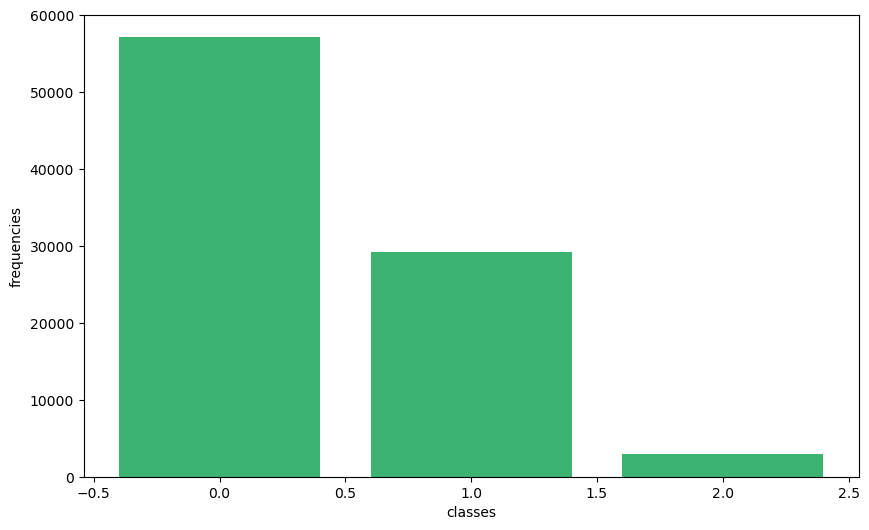

In [ ]:
# checking class distribution

plt.figure(figsize = (10,6))
plt.bar(cl,freq,  color = 'mediumseagreen')
plt.xlabel('classes')
plt.ylabel('frequencies')
plt.show()

In [12]:
df = df.drop(columns = 'popularity')



In [ ]:
# aving df for subsequent reloading 

np.savez('df for classification ',df)
np.savez ('encoded class labels with discretization', y)

DATA PARTITIONING 

In [13]:

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=100, stratify=y)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62538, 25), (26803, 25), (62538,), (26803,))

In [ ]:
# normalization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)


In [ ]:
# importing libraries for gradient boosting classification 
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
# testing gradient boosting

clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7964780061933365
F1-score [0.41364903 0.86437405 0.69317467]
              precision    recall  f1-score   support

           0       0.55      0.33      0.41       900
           1       0.85      0.87      0.86     17155
           2       0.69      0.69      0.69      8748

    accuracy                           0.80     26803
   macro avg       0.70      0.63      0.66     26803
weighted avg       0.79      0.80      0.79     26803



hyperparameter tuning 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3,1.0],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
gradient_classifier = GradientBoostingClassifier()

randomized_search = RandomizedSearchCV(estimator = gradient_classifier ,param_distributions=param_grid, cv=3, n_iter = 100, scoring='accuracy', n_jobs=-1 )

randomized_search.fit(X_train_scaled , y_train)

classification with XGBoost 

In [17]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.0 MB/s eta 0:00:00:00:0100:01


In [18]:
from xgboost import XGBClassifier

In [19]:
clf = XGBClassifier(objective='binary:logistic', 
                    max_depth = 6,
                    learning_rate = 1.0,
                    gamma = 0.0,
                    reg_lambda = 1,
                    tree_method='exact', # 'approx'
                    use_label_encoder=False,
                    random_state=42
                   )
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/Users/thomasgonzo/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy 0.7953960377569675
F1-score [0.38163558 0.86378699 0.69278657]
              precision    recall  f1-score   support

           0       0.54      0.30      0.38       900
           1       0.85      0.87      0.86     17155
           2       0.69      0.69      0.69      8748

    accuracy                           0.80     26803
   macro avg       0.69      0.62      0.65     26803
weighted avg       0.79      0.80      0.79     26803



classification with lightGMB 

In [22]:
conda install -c conda-forge lightgbm

Retrieving notices: ...working... done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::tsfresh==0.20.2=pyhd8ed1ab_0
  - conda-forge/osx-arm64::tslearn==0.6.3=py310h50ce23c_1
  - defaults/noarch::nltk==3.7=pyhd3eb1b0_0
  - conda-forge/noarch::mne==1.0.3=hd8ed1ab_1
  - defaults/osx-arm64::imbalanced-learn==0.10.1=py310hca03da5_0
  - conda-forge/noarch::tbats==1.1.3=pyhd8ed1ab_0
  - conda-forge/osx-arm64::pmdarima==2.0.4=py310hd125d64_0
  - conda-forge/noarch::nilearn==0.10.3=pyhd8ed1ab_0
  - conda-forge/noarch::pyod==1.1.3=pyhd8ed1ab_0
  - conda-forge/noarch::python-picard==0.7=pyh8a188c0_0
  - conda-forge/osx-arm64::sktime==0.27.0=py310hbe9552e_0
  - conda-forge/osx-arm64::dipy==1.9.0=py310h401b61c_0
  - conda-forge/noarch::sktime-all-extras==0.27.0=hd8ed1ab\ 
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 2

In [23]:
from lightgbm import LGBMClassifier

In [24]:
clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8023728687087266
F1-score [0.37667455 0.86767256 0.70548447]
              precision    recall  f1-score   support

           0       0.65      0.27      0.38       900
           1       0.86      0.87      0.87     17155
           2       0.70      0.72      0.71      8748

    accuracy                           0.80     26803
   macro avg       0.73      0.62      0.65     26803
weighted avg       0.80      0.80      0.80     26803

